In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('homeprice_onehot.csv')
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,61000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbinsville,2600,575000


In [3]:
dummies=pd.get_dummies(data.town)

In [4]:
dummies

,monroe township,robbinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [5]:
new_data=pd.concat([data,dummies], axis=1)
new_data

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,61000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robbinsville,2600,575000,0,1,0


Another method for one hot encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
enc = OneHotEncoder()   # object creation    'enc'-object name

In [8]:
enc.fit_transform(data[['town']])

<13x3 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [9]:
enc.fit_transform(data[['town']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [10]:
enc_data = pd.DataFrame(enc.fit_transform(data[['town']]).toarray())
enc_data

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [11]:
one_hot_data= data.join(enc_data)
one_hot_data

,town,area,price,0,1,2
0,monroe township,2600,550000,1.0,0.0,0.0
1,monroe township,3000,565000,1.0,0.0,0.0
2,monroe township,3200,61000,1.0,0.0,0.0
3,monroe township,3600,680000,1.0,0.0,0.0
4,monroe township,4000,725000,1.0,0.0,0.0
5,west windsor,2600,585000,0.0,0.0,1.0
6,west windsor,2800,615000,0.0,0.0,1.0
7,west windsor,3300,650000,0.0,0.0,1.0
8,west windsor,3600,710000,0.0,0.0,1.0
9,robbinsville,2600,575000,0.0,1.0,0.0


In [12]:
one_hot_data=one_hot_data.drop('town', axis=1)
one_hot_data


,area,price,0,1,2
0,2600,550000,1.0,0.0,0.0
1,3000,565000,1.0,0.0,0.0
2,3200,61000,1.0,0.0,0.0
3,3600,680000,1.0,0.0,0.0
4,4000,725000,1.0,0.0,0.0
5,2600,585000,0.0,0.0,1.0
6,2800,615000,0.0,0.0,1.0
7,3300,650000,0.0,0.0,1.0
8,3600,710000,0.0,0.0,1.0
9,2600,575000,0.0,1.0,0.0


In [13]:
x=one_hot_data.drop('price',axis=1)
y=one_hot_data['price']

In [14]:
x

,area,0,1,2
0,2600,1.0,0.0,0.0
1,3000,1.0,0.0,0.0
2,3200,1.0,0.0,0.0
3,3600,1.0,0.0,0.0
4,4000,1.0,0.0,0.0
5,2600,0.0,0.0,1.0
6,2800,0.0,0.0,1.0
7,3300,0.0,0.0,1.0
8,3600,0.0,0.0,1.0
9,2600,0.0,1.0,0.0


In [15]:
y

0     550000
1     565000
2      61000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [16]:
model=LinearRegression()
model.fit(x,y)

C:\Users\palla\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [17]:
model.coef_

array([   145.78370243, -97838.63685229,  41991.61470651,  55847.02214578])

In [18]:
model.intercept_

135868.09288363444

In [19]:
model.predict([[4500,0,1,0]])

array([833886.36852273])

In [20]:
model.predict([[4500,1,0,0]])

array([694056.11696393])

In [21]:
y_pred=model.predict(x)
y_pred

C:\Users\palla\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([417067.08234795, 475380.56331973, 504537.30380563, 562850.78477741,
       621164.2657492 , 570752.74134601, 599909.48183191, 672801.33304664,
       716536.44377548, 556897.33390675, 600632.44463559, 629789.18512148,
       702681.03633622])

In [22]:
pd.DataFrame({'True y values:':y , 'Predicted y values':y_pred})

,True y values:,Predicted y values
0,550000,417067.082348
1,565000,475380.563320
2,61000,504537.303806
3,680000,562850.784777
4,725000,621164.265749
5,585000,570752.741346
6,615000,599909.481832
7,650000,672801.333047
8,710000,716536.443775
9,575000,556897.333907


In [23]:
model.score(x,y)

C:\Users\palla\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.26760244239734743

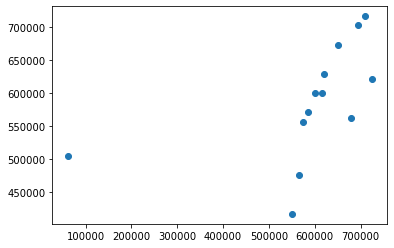

In [24]:
plt.scatter(y,y_pred)

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

19108477630.947853